In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy
import sys; sys.path.append('../')
from matplotlib import cm, colormaps, colors
from scipy.integrate import odeint
from scipy.optimize import least_squares
from tqdm import tqdm
from terrarium.utils.data import load_data
from terrarium.utils.plots import show_data

100%|██████████| 3/3 [00:09<00:00,  3.22s/it]


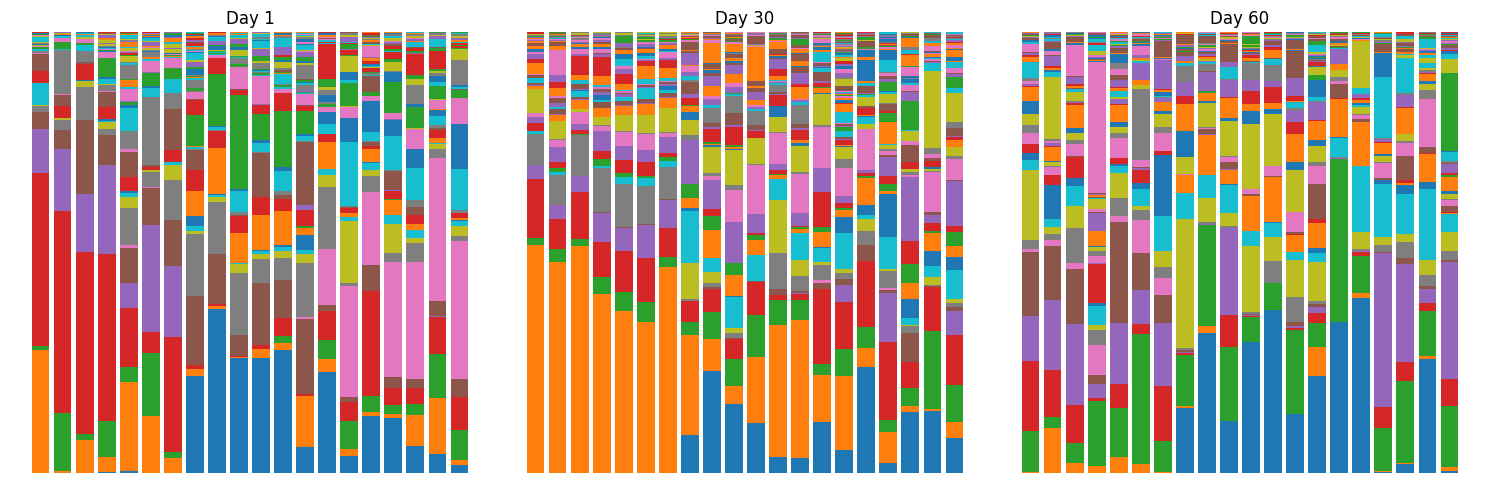

In [2]:
data = load_data('data/ann.csv', 'data/otu.csv')
show_data(data)

In [3]:
day1_data = data[data['Day'] == 1].to_numpy()[:, 6:]
day30_data = data[data['Day'] == 30].to_numpy()[:, 6:]
day60_data = data[data['Day'] == 60].to_numpy()[:, 6:]

day60_data

array([[0, 51, 1958, ..., 0, 0, 0],
       [0, 7280, 1722, ..., 0, 0, 0],
       [0, 708, 1346, ..., 0, 0, 0],
       ...,
       [367, 24, 3315, ..., 0, 0, 0],
       [9902, 231, 3923, ..., 0, 0, 0],
       [92, 260, 3600, ..., 2, 2, 2]], shape=(20, 1129), dtype=object)

In [12]:
(day1_data[0] > 0).sum()

np.int64(55)

In [4]:
X = np.concat([day1_data[:1], day30_data[:1], day60_data[:1]])
X

array([[0, 9213, 335, ..., 0, 0, 0],
       [0, 10547, 299, ..., 0, 0, 0],
       [0, 51, 1958, ..., 0, 0, 0]], shape=(3, 1129), dtype=object)

In [5]:
day1_data[0].astype(np.float64)

array([   0., 9213.,  335., ...,    0.,    0.,    0.], shape=(1129,))

In [6]:
def model(y, t, theta):
    theta = theta.reshape((n_species + 1), n_species)
    alpha, beta = theta[0], theta[1:]

    return y*(alpha + y@beta.T)

def error(theta):
    return (X - odeint(model, day1_data[0].astype(np.float64), np.arange(3), (theta,))).flatten()

In [ ]:
n_species = day1_data.shape[1]
y0 = day1_data[0].astype(np.float64)
t = np.arange(3)
theta = np.zeros((n_species + 1)*n_species)

results = least_squares(error, theta, verbose=1)

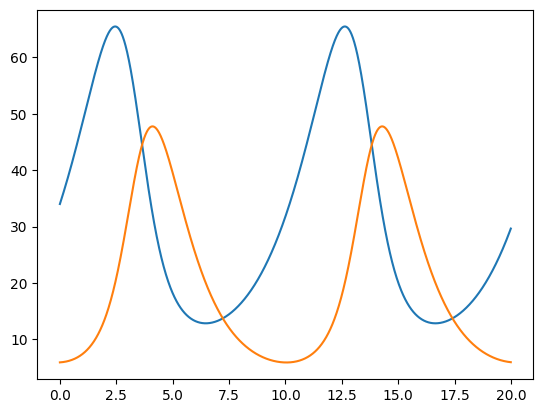

In [132]:
def model(y, t, theta):
    theta_ = theta.reshape(3, 2)
    alpha, beta = theta_[0], theta_[1:]
    return y*(alpha + y@beta.T)

y0 = np.array([34., 5.9])
t = np.arange(0, 20, .01)
theta = np.array([.52, -.84, 0., -.026, .026, 0.])

y = odeint(model, y0, t, (theta,))

plt.plot(t, y)
plt.show()

In [133]:
data = pd.DataFrame(dict(
    year = np.arange(1900., 1921., 1),
    lynx = np.array([4.0, 6.1, 9.8, 35.2, 59.4, 41.7, 19.0, 13.0, 8.3, 9.1, 7.4, 8.0, 12.3, 19.5, 45.7, 51.1, 29.7, 15.8, 9.7, 10.1, 8.6]),
    hare = np.array([30.0, 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22.0, 25.4, 27.1, 40.3, 57.0, 76.6, 52.3, 19.5, 11.2, 7.6, 14.6, 16.2, 24.7])))
    
data.head()

,year,lynx,hare
0,1900.0,4.0,30.0
1,1901.0,6.1,47.2
2,1902.0,9.8,70.2
3,1903.0,35.2,77.4
4,1904.0,59.4,36.3


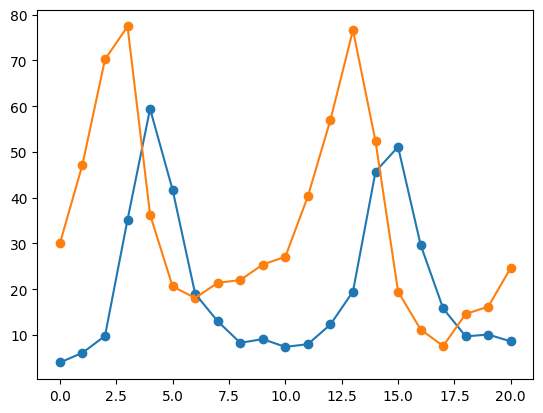

In [134]:
plt.plot(range(21), data['lynx'])
plt.scatter(range(21), data['lynx'])
plt.plot(range(21), data['hare'])
plt.scatter(range(21), data['hare'])
plt.show()

In [ ]:
def error(theta):
    return (data[['hare', 'lynx']] - odeint(model, y0, data.year, (theta,))).values.flatten()

results = least_squares(error, x0=theta0)

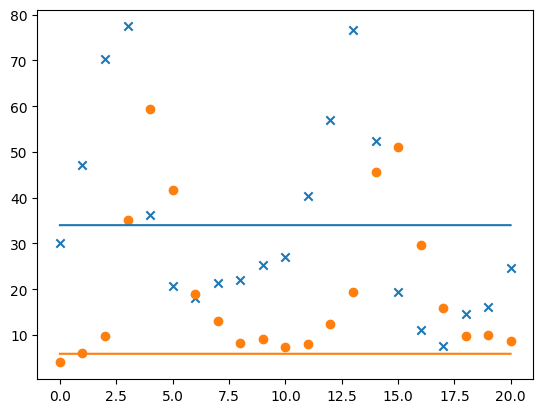

In [159]:
theta0 = np.zeros(6)
y = odeint(model, y0, t, (theta0,))

plt.plot(t, y)
plt.scatter(range(21), data['hare'], marker='x')
plt.scatter(range(21), data['lynx'], marker='o')
plt.show()

In [160]:
results = least_squares(error, x0=theta0)

/var/folders/w0/kb7t6q915g10chsx4k3m7swc0000gp/T/ipykernel_69882/1248817708.py:2: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return (data[['hare', 'lynx']] - odeint(model, y0, data.year, (theta,))).values.flatten()
/var/folders/w0/kb7t6q915g10chsx4k3m7swc0000gp/T/ipykernel_69882/1248817708.py:2: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return (data[['hare', 'lynx']] - odeint(model, y0, data.year, (theta,))).values.flatten()
/var/folders/w0/kb7t6q915g10chsx4k3m7swc0000gp/T/ipykernel_69882/1248817708.py:2: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return (data[['hare', 'lynx']] - odeint(model, y0, data.year, (theta,))).values.flatten()
/var/folders/w0/kb7t6q915g10chsx4k3m7swc0000gp/T/ipykernel_69882/1248817708.py:2: ODEint

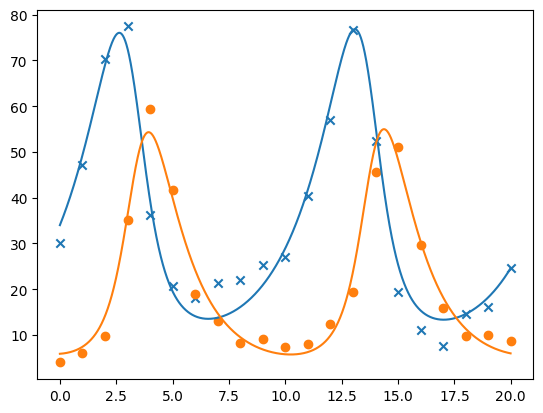

In [161]:
y = odeint(model, y0, t, (results.x,))

plt.plot(t, y)
plt.scatter(range(21), data['hare'], marker='x')
plt.scatter(range(21), data['lynx'], marker='o')
plt.show()